In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

# Part 1

In [34]:
crime_data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

## Weekly patterns

In [35]:
# prepar such that we get lables on plot in weekly order.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(days,range(len(days))))
crime_data['Day_id'] = crime_data['DayOfWeek'].map(sorterIndex)

In [36]:
crime_data[crime_data.Category=="ASSAULT"].Day_id.value_counts().sort_index()

0    26656
1    26333
2    26531
3    26021
4    28396
5    30377
6    30380
Name: Day_id, dtype: int64

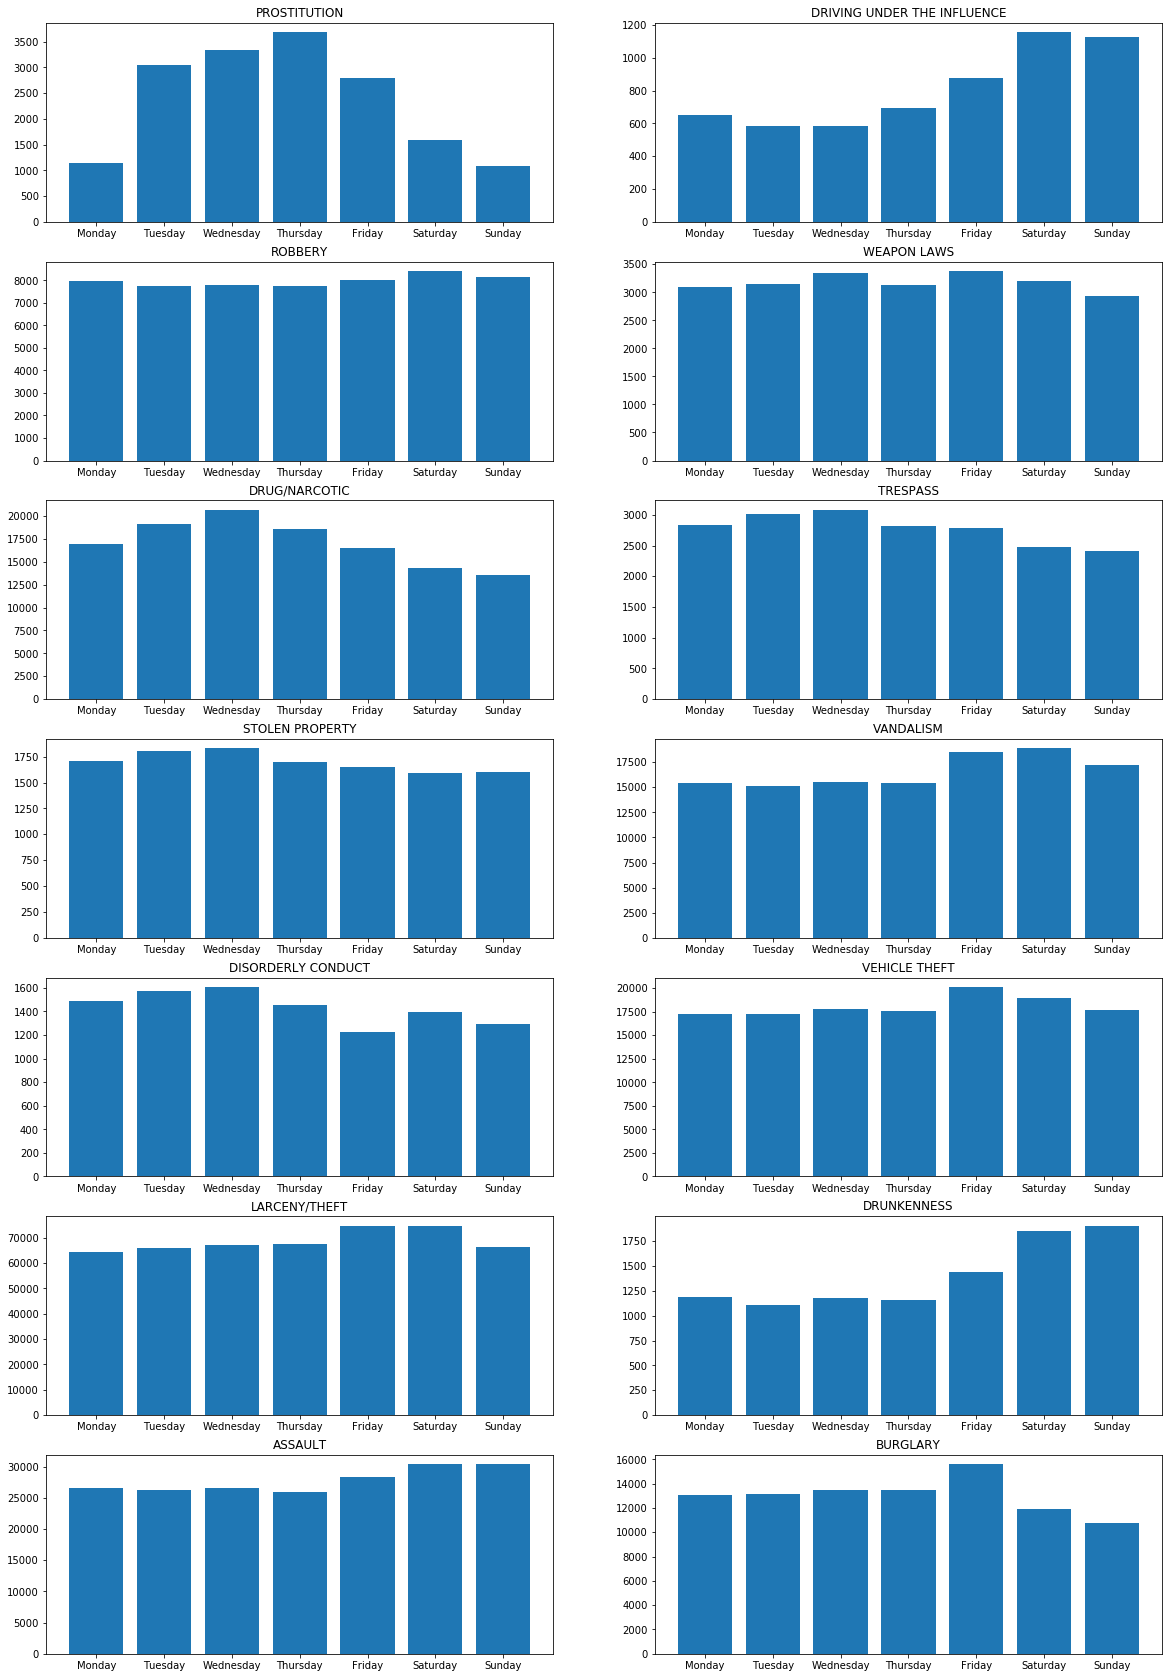

In [10]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(days)), xticklabels=days)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=crime_data[crime_data.Category==crime].Day_id.value_counts().sort_index()
    axs[i].bar(focus_crime_count.index.tolist(), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

Based on the above plots a few supprising observations can be made. For instance disorderly conduct peaks at tuesday and weedensday. Also stolen property and trespass follows a similar pattern. Even more pronounced is the tendency shown for prostitution, where there is a clear peak on thursdays, and with a noticablly high number of reports from Tuesday to Friday. When focusing on Drugs it is supprising to notice that the peak in number of reports occure on Wednesday, and that the lowest number of reports are made on Friday, Saturday and Sunday in that respectivly order.

## Yearly patterns

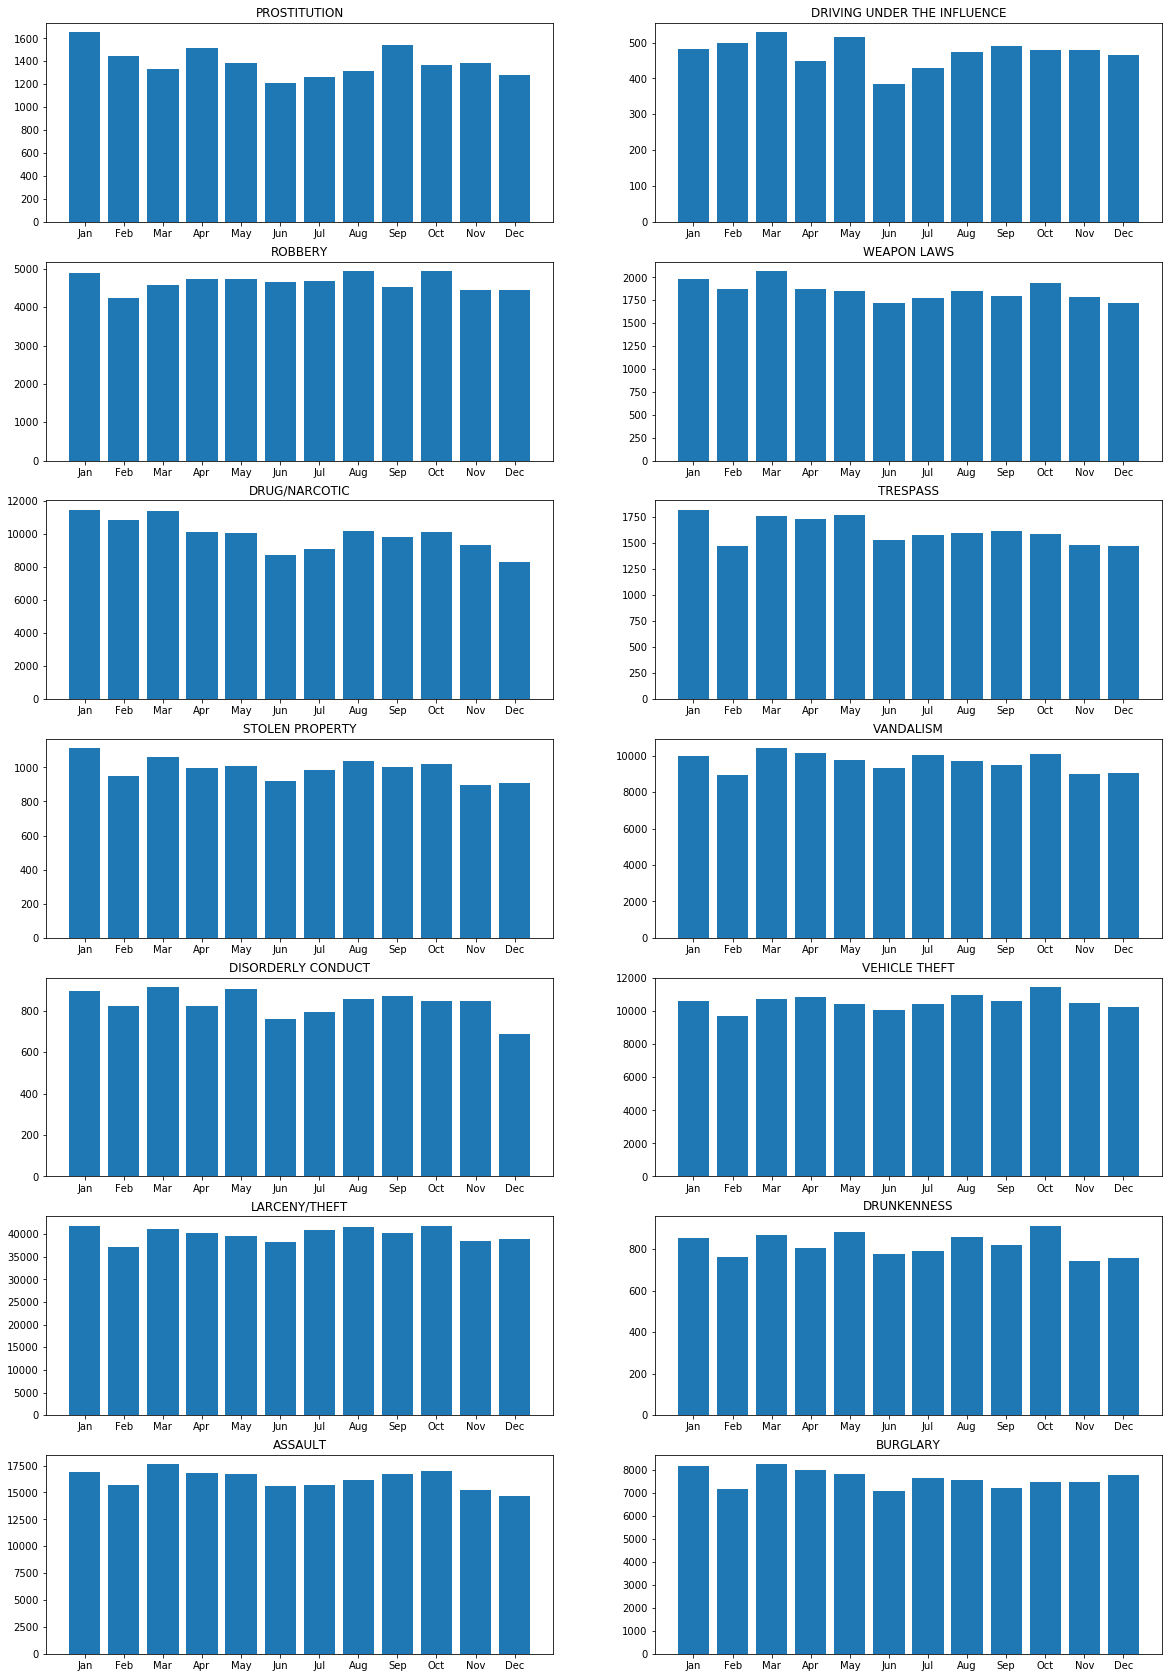

In [11]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(months)), xticklabels=months)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Date).month.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

The yearly patterns overall show that the number of reports pr. month does not varrie a lot. However there is a few interesting observations to be made. For instance June appear to be a month with few reports for all crimes types, compared to other months. This could indicate that there is less crime occuring in this month, or it could be indicating that less reports are made due to few police officers, since it is vecation season. For most crime types January appear to be a high crime month.

## The 24 hour cycle

In [43]:
from datetime import datetime

In [44]:
crime_data.Time=pd.to_datetime(crime_data['Time'])

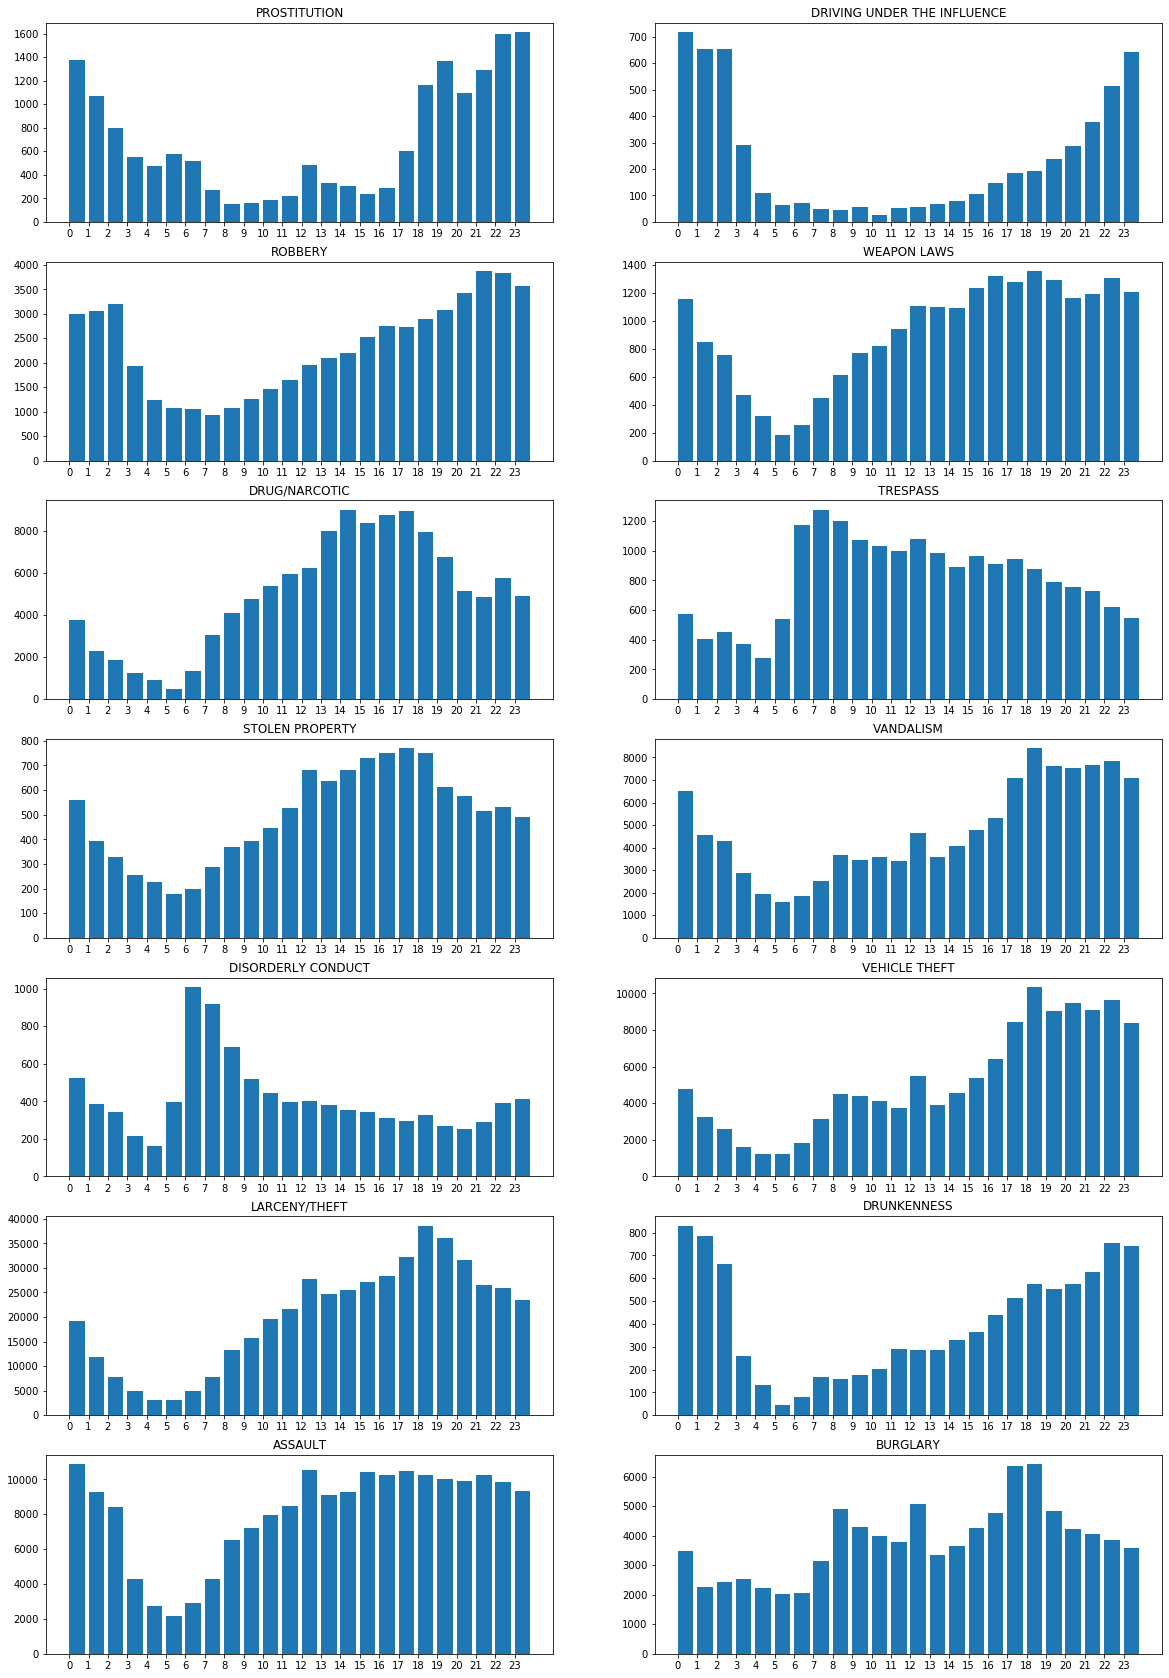

In [16]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(pd.DatetimeIndex(crime_data.Time).hour.value_counts())))
axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Time).hour.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist(),align='edge')
    axs[i].set_title(crime)
    i+=1
plt.show()

For prostitution it can be observed that from 0-7 the number of reports are decreasing and then stay low until 17 where it starts to increas again. However there is a very noticable break from this pattern from 12 to 13. A similar pattern where the number of reports are high during neight and low during morning and day hours can also be observed for **Driving under the influence**. **Weapon laws**, **Burglary** , **Robbery**, **Larcent/Theft**, **Assault** and **Drunkness** all have a steap decline in number of reports in the early morning hours around 5.
The pattern observed for **Disorderly conduct** stands out from the rest of the crimes. Here a very clear peak is observed at 6-7, and after a decline a smaller peak can be observed at 0-1.

In [45]:
print(np.array(crime_data[(crime_data.Time.dt.hour==0) & (crime_data.Category=="PROSTITUTION")].groupby("DayOfWeek").size()))
print(crime_data[(crime_data.Time.dt.hour==0) & (crime_data.Category=="PROSTITUTION")].groupby("DayOfWeek").size().sort_index())
print(crime_data[(crime_data.Time.dt.hour==0) & (crime_data.Category=="PROSTITUTION")].Day_id.value_counts().sort_index())

[188 139 285 205 240 164 156]
DayOfWeek
Friday       188
Monday       139
Saturday     285
Sunday       205
Thursday     240
Tuesday      164
Wednesday    156
dtype: int64
0    139
1    164
2    156
3    240
4    188
5    285
6    205
Name: Day_id, dtype: int64


## Hours of the week

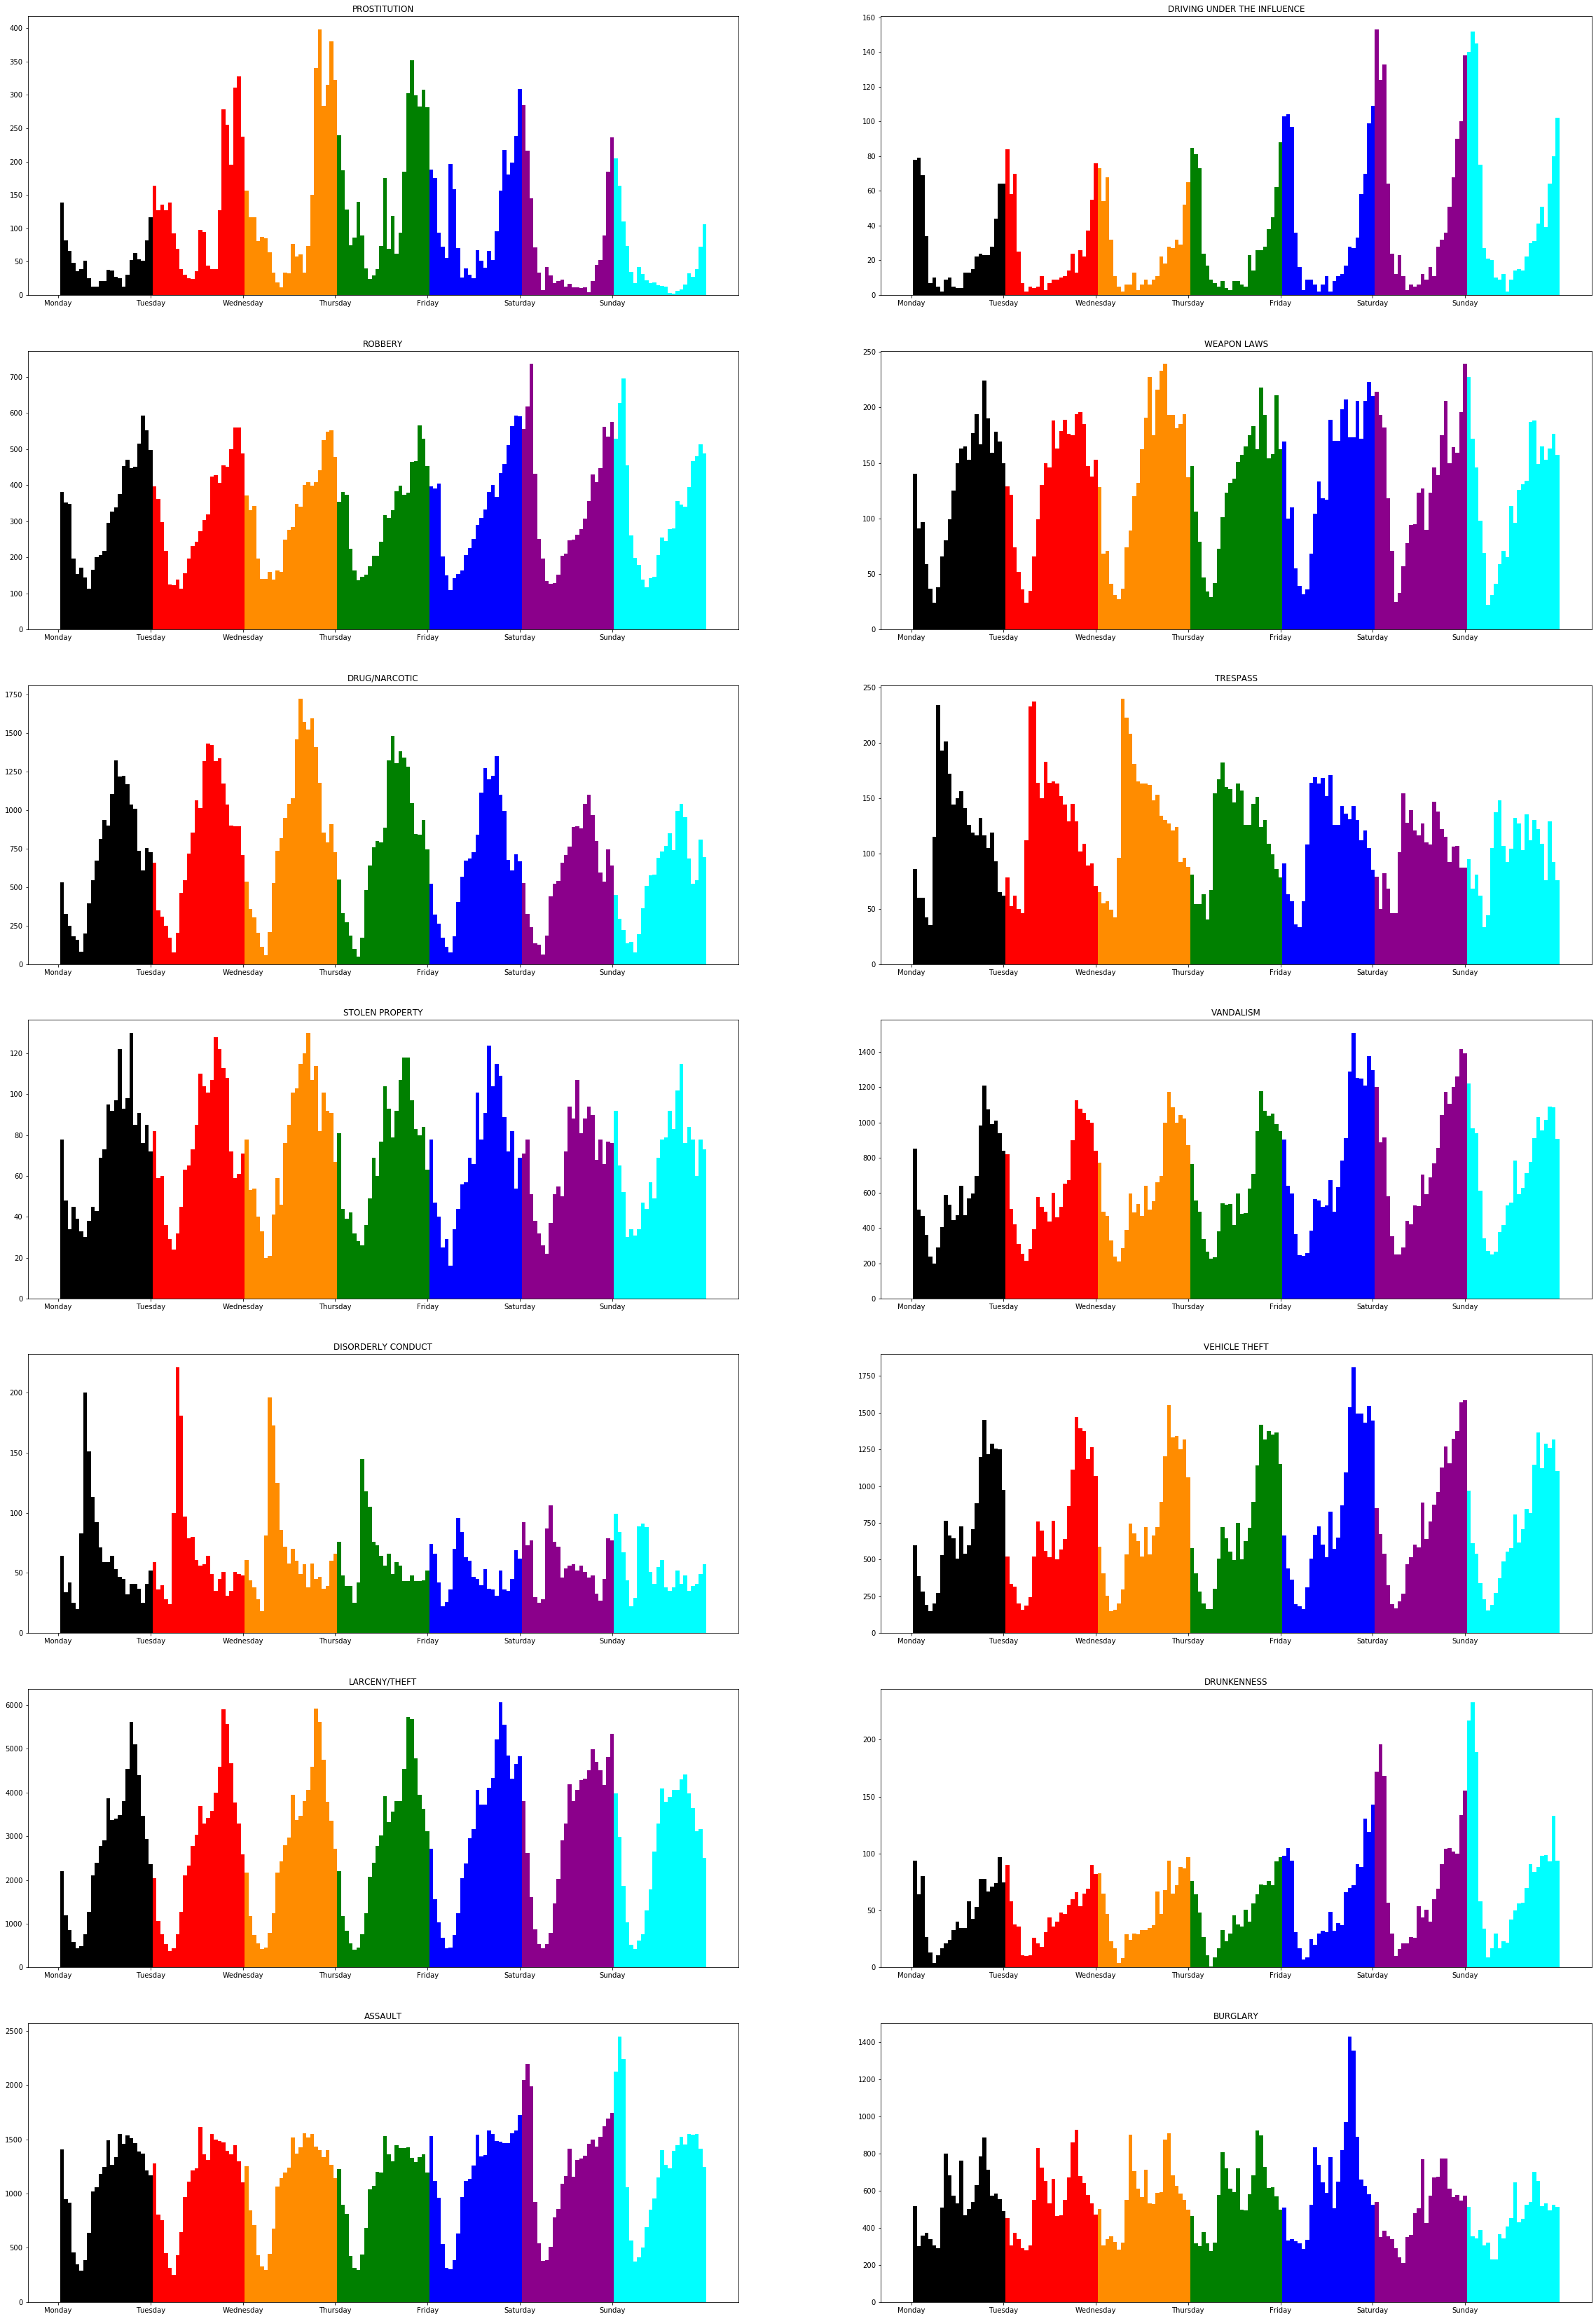

In [47]:
x = np.arange(len(days))
width = 1
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(40,60))
plt.setp(axs, xticklabels=days,xticks=x)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    w=1
    for h in range(24):
        test=np.array(crime_data[(crime_data.Time.dt.hour==h) & (crime_data.Category==crime)].Day_id.value_counts().sort_index())
        axs[i].bar(x+w*(width/24), test,width/24, color=['black', 'red', 'darkorange','green', 'blue','darkmagenta', 'cyan'])
        w+=1
    axs[i].set_title(crime)
    i+=1
plt.show()

The above plots show a number of interesting cases in which the pattern over 24 hourse, stands out for certain days of the week. One such example is **Burglary**. Her it can be observed that esspecially Friday stand out from the rest of days, with a very large peak in the evening. Also for **Assult** the day of the week appear to be influencing the pattern of when reports are made. Here it is Saturday and Sunday that stands out with peaks around midnight. For **Trespass** there is a change in patterns for Sundays where the decline in number of reports there can normally be observed during the day is more flat. At last it can be observed that for **Prostitution** the midday pattern varries from weekdays and weekends.

#  Part 2

## Questions for the first video lecture

***What is the difference between data and metadata? How does that relate to the bike-example?***

"Meta data is data about data". So where data describe ceratin recordings, then meta data is information about the recordings them self. So for instance in the bike example we have data for heart rate, but there is also data describing where that data was recorded.

## Questions for the second video lecture

# Part 3

### Jitter plot with from 13-14 with category Assault from June to September at 2016 

In [4]:
crime_data['Time1'] = pd.to_datetime(crime_data['Time'])
df1 = crime_data[crime_data['Category']=='ASSAULT'].set_index('Time1').between_time('12:59:00','14:00:00')

In [5]:
df1['Date'] = df1.Date +" " + df1.Time
df1['Date1'] = pd.to_datetime(df1['Date'])
df1
#df1=crime_data[crime_data['Category']=='ASSAULT'].set_index('Date').between_time('12:59:00','14:00:00')

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Date1
Time1,,,,,,,,,,,,,,
2020-02-26 13:00:00,150103831,ASSAULT,BATTERY,Wednesday,01/21/2015 13:00,13:00,SOUTHERN,NONE,100 Block of OTIS ST,-122.420303,37.770897,POINT (-122.420303482492 37.770896885856),15010383104134,2015-01-21 13:00:00
2020-02-26 13:00:00,150105326,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Tuesday,02/03/2015 13:00,13:00,INGLESIDE,NONE,1000 Block of CAYUGA AV,-122.440007,37.721805,POINT (-122.440006611531 37.7218048835547),15010532604014,2015-02-03 13:00:00
2020-02-26 13:38:00,150100796,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Monday,02/02/2015 13:38,13:38,SOUTHERN,NONE,1100 Block of FOLSOM ST,-122.408564,37.776097,POINT (-122.40856429774 37.7760967348453),15010079604013,2015-02-02 13:38:00
2020-02-26 13:09:00,150117014,ASSAULT,BATTERY,Saturday,02/07/2015 13:09,13:09,RICHMOND,NONE,200 Block of 26TH AV,-122.486086,37.784751,POINT (-122.486085858566 37.7847505828099),15011701404134,2015-02-07 13:09:00
2020-02-26 13:08:00,150111953,ASSAULT,THREATS AGAINST LIFE,Thursday,02/05/2015 13:08,13:08,INGLESIDE,NONE,0 Block of REGENT ST,-122.456408,37.709692,POINT (-122.456407784485 37.709691756097),15011195319057,2015-02-05 13:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26 13:50:00,160626613,ASSAULT,THREATS AGAINST LIFE,Wednesday,08/03/2016 13:50,13:50,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411800,37.784089,POINT (-122.41180013475322 37.784089036686844),16062661319057,2016-08-03 13:50:00
2020-02-26 13:30:00,160858327,ASSAULT,BATTERY,Friday,10/21/2016 13:30,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,POINT (-122.41974899397749 37.7618672648972),16085832704134,2016-10-21 13:30:00
2020-02-26 13:00:00,160411072,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Thursday,05/19/2016 13:00,13:00,BAYVIEW,NONE,700 Block of BRUSSELS ST,-122.403750,37.722928,POINT (-122.40375044380448 37.72292778385021),16041107204013,2016-05-19 13:00:00


In [6]:
df2 = df1[(df1["Date1"].dt.month >=6) & (df1["Date1"].dt.month <=9)&(df1["Date1"].dt.year == 2016)]
df2

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Date1
Time1,,,,,,,,,,,,,,
2020-02-26 13:30:00,160667009,ASSAULT,THREATS AGAINST LIFE,Tuesday,08/16/2016 13:30,13:30,RICHMOND,NONE,2800 Block of CALIFORNIA ST,-122.441302,37.788014,POINT (-122.4413017475882 37.788013581323575),16066700919057,2016-08-16 13:30:00
2020-02-26 13:00:00,160596066,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,07/24/2016 13:00,13:00,NORTHERN,"ARREST, BOOKED",1700 Block of POST ST,-122.430579,37.785412,POINT (-122.43057928012803 37.78541211256682),16059606604013,2016-07-24 13:00:00
2020-02-26 14:00:00,160511973,ASSAULT,BATTERY,Friday,06/24/2016 14:00,14:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.40340479147905 37.775420706711),16051197304134,2016-06-24 14:00:00
2020-02-26 13:50:00,160574169,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,07/16/2016 13:50,13:50,MISSION,"ARREST, BOOKED",3000 Block of 24TH ST,-122.412210,37.752669,POINT (-122.41220998636746 37.752668520449554),16057416904136,2016-07-16 13:50:00
2020-02-26 13:13:00,160590911,ASSAULT,BATTERY,Friday,07/22/2016 13:13,13:13,SOUTHERN,NONE,5TH ST / HOWARD ST,-122.404934,37.781499,POINT (-122.40493441333854 37.781498721321796),16059091104134,2016-07-22 13:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26 13:34:00,160619226,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Monday,08/01/2016 13:34,13:34,NORTHERN,"ARREST, BOOKED",MARINA BL / AVILA ST,-122.440003,37.806075,POINT (-122.44000281007312 37.8060749226245),16061922604014,2016-08-01 13:34:00
2020-02-26 13:23:00,160461293,ASSAULT,BATTERY,Monday,06/06/2016 13:23,13:23,SOUTHERN,NONE,8TH ST / MISSION ST,-122.413161,37.777457,POINT (-122.41316085096972 37.777456661180715),16046129304134,2016-06-06 13:23:00
2020-02-26 14:00:00,160571604,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,07/15/2016 14:00,14:00,MISSION,NONE,1300 Block of VALENCIA ST,-122.420653,37.751285,POINT (-122.42065335473585 37.75128511701907),16057160404013,2016-07-15 14:00:00


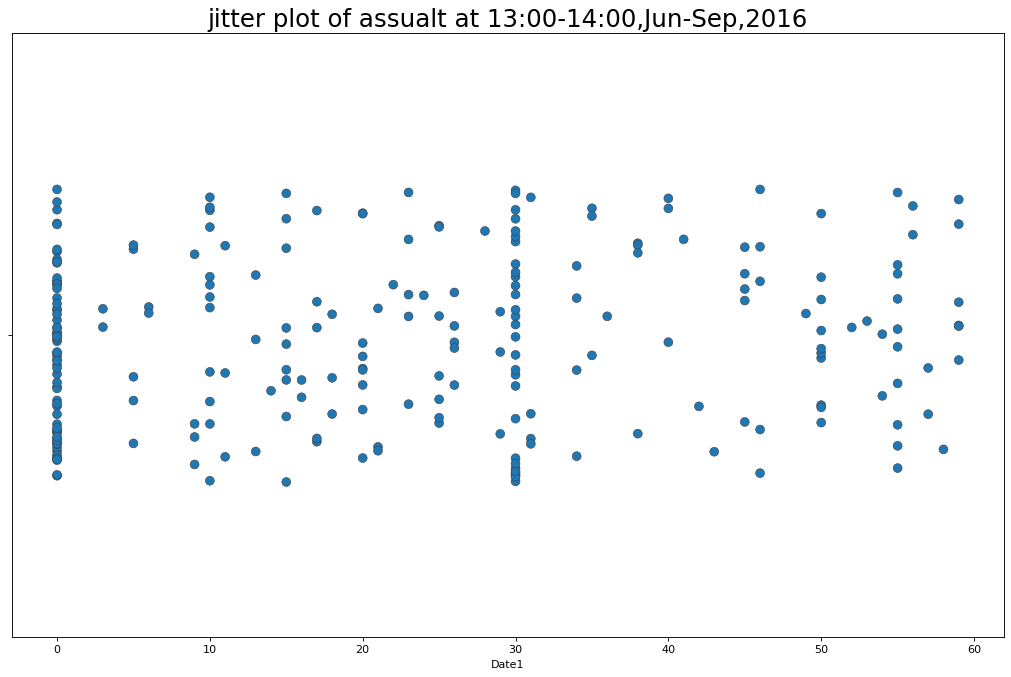

In [7]:
#months=["Mar","Apr","May","Jun","Jul","Aug"]
fig,ax = plt.subplots(figsize=(16,10),dpi = 80)

sns.stripplot(df2.Date1.dt.minute,jitter = 0.25,size = 8,ax = ax,linewidth =.5)
plt.title('jitter plot of assualt at 13:00-14:00,Jun-Sep,2016', fontsize=22)
plt.show()

# Part 4

# Part 5

# Part 6